# Churn - Hyper-Parameters

## Load Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

DEBUG = True
SEED = 76

In [5]:
import os
for d in ['src','data','output']: os.makedirs(d, exist_ok=True)

In [6]:
from IPython.display import Markdown, display

In [7]:
# utility funciton for typesetting percentages
display_fraction = lambda n,d: (n/d*100, n, d)

## Load and Prepare the Data 

I have made a slight change of naming convention which will simply code below - and also avoid mistakes in lab sessions when I rerun cells out of order to demo parts of the code.   Rather than using __df__ to store the full dataset I will use __df_all__, and use __df__ as an alias for various dataset as needed - see [Feature Engineering](#Feature_Engineering). So will try to follow naming convention:

 * __df__ alias for various datasets (trwated link a tmp variable, more later). 
 * __df_all__ full dataset after loading and prepped (columns renamed, value recoded).
 * __df_model__ dataset with target and a subset of the original attributes that may appear in model or be used to construct other attributes.
 * __df_train__ dataset 
 * __df_test__ dataset 

In [8]:
df_churn = pd.read_csv("data/churn.csv")
print("Churn", df_churn.shape)
df_states = pd.read_csv("data/states.csv")
print("States", df_states.shape)

df_all = df_churn.merge(df_states, on="State")

message = (" * Data set consists of %d cases (rows) with %s attributes (cols) and a single target."  
% (df_all.shape[0], df_all.shape[1]-1))
Markdown(message)

Churn (3333, 20)
States (52, 4)


 * Data set consists of 3333 cases (rows) with 22 attributes (cols) and a single target.

## Pre-Processing Data

 * Filter features - for simplicity doing next to nothing here, and getting of state information

In [9]:
target = "Churn"

attributes = df_all.columns.tolist()
attributes.remove(target)
for c in ["Churn", "State", "Name", "Longitude", "Latitude"]: 
    if c in attributes: attributes.remove(c)

df_model = df_all.loc[:, attributes + [target]]

## Feature Engineering

 * To keep a level playing field here, we are not going to perform any feature engineering steps.

## Model Building

### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_model, stratify=df_model[target], test_size=.40, random_state=SEED)
print(df_train.shape, df_test.shape)

(1999, 19) (1334, 19)


In [11]:
df_train.head(1)

,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
3219,106,510,0,1,33,81.6,120,13.87,235.6,85,20.03,150.9,113,6.79,9.9,4,2.67,1,0


### Data normalizing and scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(df_train.loc[:,attributes].astype(float))
y_train = df_train[target].values

X_test = scaler.transform(df_test.loc[:,attributes].astype(float))
y_test = df_test[target].values

---
### Training &mdash; TODO

 * Pick any classifier from sklearn (EXCEPT SVC and neural networks for time reasons).
 * Select hyper-parameters to tune.
 * Generate parameter search space.
 * Perform search.
 
Thing I'm looking for:

 * (Obviously) best score (accuracy)
 * Mixture of grid and random search
 * Optional - using hyperopt

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
param_range = np.logspace(-4, 4, 9) 

param_grid = [{
    'solver': ['newton-cg', 'lbfgs', 'saga'],
     'C': param_range, 
    'penalty': ['l1', 'none']
}]

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

gs_result = gs.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [24]:
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))

Best: 0.857762 using {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
means = gs_result.cv_results_['mean_test_score']
stds = gs_result.cv_results_['std_test_score']
params = gs_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### TODO another classifier

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

gs_result = gs.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))

#### TODO another classifier

In [2]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

gs_result = gs.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))

#### TODO another classifier

### Evaluation (Using Test)

 * Using best classifier found above with best hyper-parameters fit to data and evaluate against `test` data.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Accuracy

In [25]:
accuracy_score(y_test, y_pred)

0.8628185907046477

#### Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1115,   26],
       [ 157,   36]])

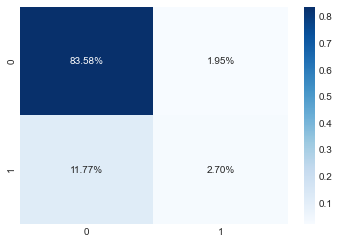

In [28]:
import seaborn as sns
sns.heatmap(cm/ np.sum(cm), annot=True, fmt=".2%", cmap="Blues");
plt.savefig("confusion_matrix.png", bbox_inches="tight")

#### Classification Report

In [21]:
print(classification_report(y_test, y_pred,  digits=4))

              precision    recall  f1-score   support

           0     0.8766    0.9772    0.9242      1141
           1     0.5806    0.1865    0.2824       193

    accuracy                         0.8628      1334
   macro avg     0.7286    0.5819    0.6033      1334
weighted avg     0.8338    0.8628    0.8313      1334

